# Starbucks Rewards: Predicting Consumer Responses

The project is an experiment that determines how do we take this experimental data and discover what are the offers that excite people? So, it’s about discovering what is the most valuable offer there is, not just for the customers as a whole but at an individual personal level. 

Starbucks rewards mobile app customers are simulated with this simulated data. An offer could be an advertisement for a drink, a discount, or a buy one get one free deal. Some customers may not be sent offers during certain days or weeks and not all customers will receive the same offer. That is the challenge to solve using this dataset, who gets what offer? 

In [ ]:
# TODO: Install any packages that you might need

In [50]:
# TODO: Import any packages that you might need
from collections import defaultdict
import pandas as pd
import numpy as np

## Data Preparation

### Dataset details

portfolio.json
* id (string) - offer id
* offer_type (string) - a type of offer ie BOGO, discount, informational
* difficulty (int) - the minimum required to spend to complete an offer
* reward (int) - the reward is given for completing an offer
* duration (int) - time for the offer to be open, in days
* channels (list of strings)

profile.json
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

transcript.json
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since the start of the test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record



## Overview


In [44]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'became_member_on'}>],
       [<AxesSubplot:title={'center':'income'}>, <AxesSubplot:>]],
      dtype=object)

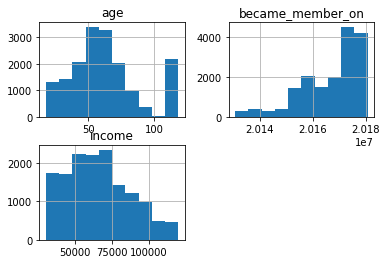

In [23]:
profile.hist()

array([[<AxesSubplot:title={'center':'time'}>]], dtype=object)

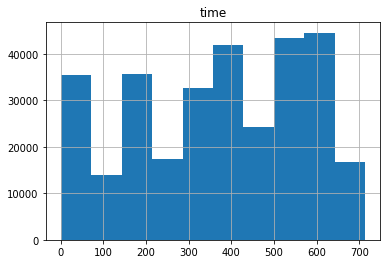

In [25]:
transcript.hist()

## Class details

In [20]:
print(portfolio)

   reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f

## Class distributions of offers recieved, offers viewed, and offers completed

In [11]:
offers_recieved = transcript[transcript['event']=="offer received"]
offers_viewed = transcript[transcript['event']=="offer viewed"]
offers_completed = transcript[transcript['event']=="offer completed"]

In [15]:
def view_offers(offers):
    offer_count = defaultdict(int)
    for offer in offers.value:
        val = offer['offer id'] if 'offer id' in offer else offer['offer_id']
        if val in offer_count:
            offer_count[val]+=1
        else:
            offer_count[val] = 1

    return offer_count

recieved_count = view_offers(offers_recieved)
viewed_count = view_offers(offers_viewed)
completed_count = view_offers(offers_completed)

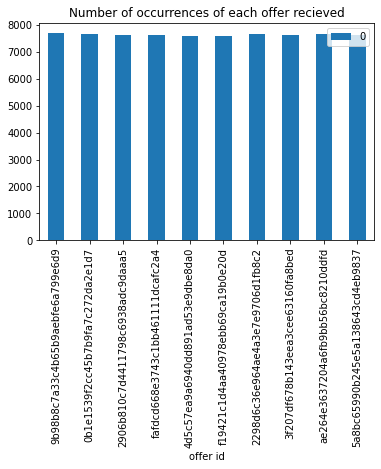

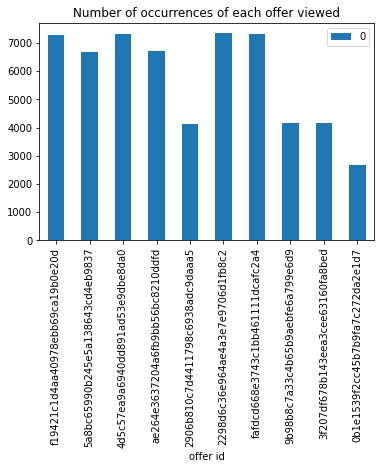

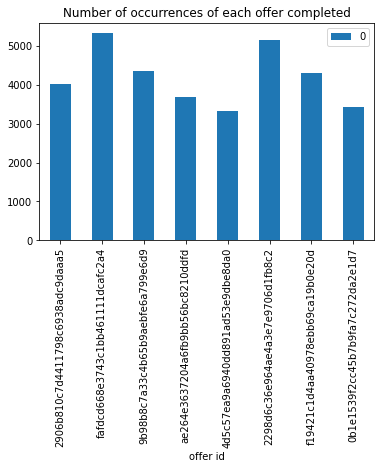

In [18]:
def check_data(offer_count,offer_name):
    data = pd.DataFrame.from_dict(offer_count, orient='index')
    bar_plot = data.plot.bar(title="Number of occurrences of each offer"+offer_name)
    bar_plot.set_xlabel("offer id")

check_data(recieved_count," recieved")
check_data(viewed_count, " viewed")
check_data(completed_count, " completed")

## Data Cleaning and Preprocessing

We will handle missing values in the <strong>genders</strong> column in the `profile.json` data set by assigning an unique category. 

pros:
Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical.
Negates the loss of data by adding an unique category

cons:
Adds less variance
Adds another feature to the model while encoding, which may result in poor performance

We will handle missing values in the <strong>income</strong> column in the `profile.json` data set by replacing with mean. 

Pros:
This is a better approach when the data size is small
It can prevent data loss which results in removal of the rows and columns

Cons:
Inputing the approximations add variance and bias
Works poorly compared to other multiple-imputations method

In [48]:
profile["gender"].fillna('U', inplace=True)
print(profile)

      gender  age                                id  became_member_on  \
0          U  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2          U  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4          U  118  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  
0           NaN  
1      112000.0  
2           NaN  
3      100000.0  
4           NaN  
...         ...

In [51]:
num = profile["income"].isnull().sum()
print(num)
mean_val = profile["income"].mean()
print(mean_val)

2175
65404.9915682968


In [52]:
profile["income"].replace(np.NaN, mean_val, inplace=True)
print(profile)

      gender  age                                id  became_member_on  \
0          U  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2          U  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4          U  118  a03223e636434f42ac4c3df47e8bac43          20170804   
...      ...  ...                               ...               ...   
16995      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
16996      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
16997      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
16998      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
16999      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

              income  
0       65404.991568  
1      112000.000000  
2       65404.991568  
3      100000.000000  
4       

In [ ]:
#TODO: Upload the data to AWS S3

## Model Training
**Note:** You will need to use the `train.py` script to train your model.

In [ ]:
#TODO: Declare your model training hyperparameter.
#NOTE: You do not need to do hyperparameter tuning. You can use fixed hyperparameter values

In [ ]:
#TODO: Create your training estimator

In [ ]:
# TODO: Fit your estimator

### Hyperparameter Tuning

In [ ]:
#TODO: Create your hyperparameter search space

In [ ]:
#TODO: Create your training estimator

In [ ]:
# TODO: Fit your estimator

In [ ]:
# TODO: Find the best hyperparameters

### Model Deploying and Querying

In [ ]:
# TODO: Deploy your model to an endpoint

In [ ]:
# TODO: Run an prediction on the endpoint

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done